In [14]:
import json
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.optimizers import Adam
from keras import regularizers
import keras.utils as ku 
import numpy as np

In [15]:
f = open('/kaggle/input/lyrics.json',)
data = json.load(f)

In [16]:
lis=[]
for line in data.values():
    lis.append(line)
lis=lis[0:400]
#removing "lyrics of"
i=0
for _ in lis:
    lis[i] = lis[i][10:]
    i+=1
for i in range(1,len(lis)):
    lis[0]=lis[0]+lis[i]
tokenizer = Tokenizer()
data=lis[0]
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [17]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [18]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [19]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 18, 100)           944900    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 18, 300)           301200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 18, 300)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 9449)              954349    
Total params: 2,360,849
Trainable params: 2,360,849
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/100
86002/86002 [==============================] - 143s 2ms/step - loss: 7.1473 - accuracy: 0.0428
Epoch 2/100
86002/86002 [==============================] - 141s 2ms/step - loss: 6.5538 - accuracy: 0.0549
Epoch 3/100
86002/86002 [==============================] - 140s 2ms/step - loss: 6.0558 - accuracy: 0.0915
Epoch 4/100
86002/86002 [==============================] - 139s 2ms/step - loss: 5.5784 - accuracy: 0.1278
Epoch 5/100
86002/86002 [==============================] - 141s 2ms/step - loss: 5.1408 - accuracy: 0.1636
Epoch 6/100
86002/86002 [==============================] - 141s 2ms/step - loss: 4.7453 - accuracy: 0.2033
Epoch 7/100
86002/86002 [==============================] - 142s 2ms/step - loss: 4.4253 - accuracy: 0.2356
Epoch 8/100
86002/86002 [==============================] - 144s 2ms/step - loss: 4.1321 - accuracy: 0.2707
Epoch 9/100
86002/86002 [==============================] - 143s 2ms/step - loss: 3.8733 - accuracy: 0.3013
Epoch 10/100
86002/86002 [===========

86002/86002 [==============================] - 146s 2ms/step - loss: 0.9725 - accuracy: 0.7571
Epoch 77/100
86002/86002 [==============================] - 147s 2ms/step - loss: 0.9655 - accuracy: 0.7598
Epoch 78/100
86002/86002 [==============================] - 146s 2ms/step - loss: 0.9642 - accuracy: 0.7582
Epoch 79/100
86002/86002 [==============================] - 147s 2ms/step - loss: 0.9604 - accuracy: 0.7593
Epoch 80/100
86002/86002 [==============================] - 147s 2ms/step - loss: 0.9548 - accuracy: 0.7603
Epoch 81/100
86002/86002 [==============================] - 148s 2ms/step - loss: 0.9470 - accuracy: 0.7623
Epoch 82/100
86002/86002 [==============================] - 149s 2ms/step - loss: 0.9441 - accuracy: 0.7621
Epoch 83/100
86002/86002 [==============================] - 148s 2ms/step - loss: 0.9412 - accuracy: 0.7615
Epoch 84/100
86002/86002 [==============================] - 149s 2ms/step - loss: 0.9299 - accuracy: 0.7654
Epoch 85/100
86002/86002 [===============

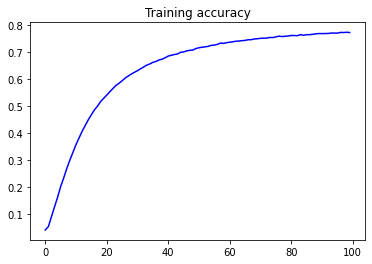

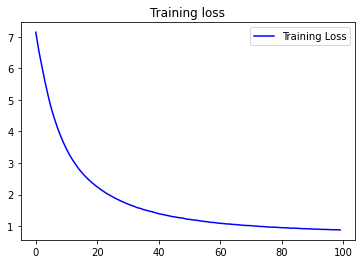

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [42]:
def get_prediction(seed_text):
    next_words = 10

    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    print(seed_text)

In [44]:
input_string = str(input(""))
get_prediction(input_string)

zindagi ka yeh
zindagi ka yeh kya hai kar raha hai jaana haan mujhe na jaaye
